## Prophet

Prophet FB was developed by Facebook as an algorithm for the in-house prediction of time series values for different business applications. Therefore, it is specifically designed for the prediction of business time series.

It is an additive model consisting of four components:

Prophet
Let us discuss the meaning of each component:

g(t): It represents the trend and the objective is to capture the general trend of the series. For example, the number of advertisements views on Facebook is likely to increase over time as more people join the network. But what would be the exact function of increase?
s(t): It is the Seasonality component. The number of advertisement views might also depend on the season. For example, in the Northern hemisphere during the summer months, people are likely to spend more time outdoors and less time in from of their computers. Such seasonal fluctuations can be very different for different business time series. The second component is thus a function that models seasonal trends. 
h(t): The Holidays component. We use the information for holidays which have a clear impact on most business time series. Note that holidays vary between years, countries, etc. and therefore the information needs to be explicitly provided to the model.
The error term εt stands for random fluctuations that cannot be explained by the model. As usual, it is assumed that εt follows a normal distribution N (0, σ2) with zero mean and unknown variance σ that has to be derived from the data.

In [21]:
# This is for the Lima district (Deaths)
# Python
import pandas as pd
from prophet import Prophet
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSA5900/LIMA_DPT_PVN_DISTRICT.csv')
df.head()

,fecha_resultado,departamento,provincia,distrito,num_death_cases,num_positive_cases
0,2020-03-12,LIMA,LIMA,LIMA,0,1
1,2020-03-14,LIMA,LIMA,LIMA,0,1
2,2020-03-15,LIMA,LIMA,LIMA,0,3
3,2020-03-16,LIMA,LIMA,LIMA,1,1
4,2020-03-17,LIMA,LIMA,LIMA,0,1


In [4]:
df.describe()

,num_death_cases,num_positive_cases
count,1116.000000,1116.000000
mean,7.770609,156.546595
std,10.837374,295.832083
min,0.000000,0.000000
25%,0.750000,28.000000
50%,2.000000,62.000000
75%,11.000000,186.250000
max,45.000000,2477.000000


In [5]:
print(df['num_positive_cases'].unique())
print(df['fecha_resultado'].unique())

[   1    3    2    4    5    6   10   11   16   13    9   31   25   36
   43   58   53   80   37   20   48   61   41  102  166  158  211  177
  109  116   88   65  523  202  222  134  114  173  193  133  187  159
  103  101   52  164  217  171  136  163   99  198  207  238  326  344
  272   60  196  197  201  240  280  225   63  267  203   94  141  234
  200  121  170  229  182  138  153  131  152   73  145  117  125   89
   56  111  123  115   83   49   87  112  113  106   90  150  186   98
  105  139   54   96  137  168  165   77  175   76  157  292  167  184
  235  210  294  209  266  190  108  258  347  264  293  212   50  204
  213  250  252   75  192  223  275  118   71  162  436   59  147  183
  231  161   82  148  189   95   79  151  188   57   44   64   72   35
   69   24  149   68   45   29   62   28    0   38   19   55   40   18
   27   34   42   30   46   32   26   67   84  107   93  185  248  127
  130  181  239  228  174  226  242  160  281  257  338  335  259  156
  256 

In [6]:
df.dtypes

fecha_resultado       object
departamento          object
provincia             object
distrito              object
num_death_cases        int64
num_positive_cases     int64
dtype: object

In [7]:
df['fecha_resultado'] = pd.to_datetime(df['fecha_resultado'], format='%Y/%m/%d')

In [8]:
df['Year'] = df['fecha_resultado'].dt.year
df['Month'] = df['fecha_resultado'].dt.month
df['Day'] = df['fecha_resultado'].dt.day
df['ds'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [9]:
df.head()

,fecha_resultado,departamento,provincia,distrito,num_death_cases,num_positive_cases,Year,Month,Day,ds
0,2020-03-12,LIMA,LIMA,LIMA,0,1,2020,3,12,2020-03-12
1,2020-03-14,LIMA,LIMA,LIMA,0,1,2020,3,14,2020-03-14
2,2020-03-15,LIMA,LIMA,LIMA,0,3,2020,3,15,2020-03-15
3,2020-03-16,LIMA,LIMA,LIMA,1,1,2020,3,16,2020-03-16
4,2020-03-17,LIMA,LIMA,LIMA,0,1,2020,3,17,2020-03-17


In [10]:
df.dtypes

fecha_resultado       datetime64[ns]
departamento                  object
provincia                     object
distrito                      object
num_death_cases                int64
num_positive_cases             int64
Year                           int64
Month                          int64
Day                            int64
ds                    datetime64[ns]
dtype: object

In [11]:
df.drop(['fecha_resultado', 'departamento', 'provincia', 'distrito','num_death_cases', 'Year', 'Month', 'Day', ], axis=1, inplace= True)
df.columns = ['y', 'ds']

In [12]:
df.head()

,y,ds
0,1,2020-03-12
1,1,2020-03-14
2,3,2020-03-15
3,1,2020-03-16
4,1,2020-03-17


In [13]:
df['y'] = df['y'].cumsum()
df

,y,ds
0,1,2020-03-12
1,2,2020-03-14
2,5,2020-03-15
3,6,2020-03-16
4,7,2020-03-17
...,...,...
1111,174637,2023-03-30
1112,174659,2023-03-31
1113,174686,2023-04-01
1114,174692,2023-04-02


In [14]:
# First 1000 days
df_first_1000 = df.iloc[:1000, :]
df_first_1000

,y,ds
0,1,2020-03-12
1,2,2020-03-14
2,5,2020-03-15
3,6,2020-03-16
4,7,2020-03-17
...,...,...
995,167424,2022-12-04
996,168174,2022-12-05
997,168891,2022-12-06
998,169421,2022-12-07


In [15]:
m = Prophet(interval_width= 0.95, daily_seasonality = True) # interval_width looks at our confidemce interval
model = m.fit(df_first_1000) # fit the data using fit, similar to other prediction models 

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1nsux0k/sftvodi_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1nsux0k/ljo6rrgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22873', 'data', 'file=/tmp/tmpc1nsux0k/sftvodi_.json', 'init=/tmp/tmpc1nsux0k/ljo6rrgr.json', 'output', 'file=/tmp/tmpc1nsux0k/prophet_modelknd8btd1/prophet_model-20230427112252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
#Predictions or Forecast
future = m.make_future_dataframe(periods=116, freq='D') # periods up to 14 days. Frequency in day. 
forecast = m.predict(future) # predict is used to forecast forward
forecast.head() # display the first 5 rows in historical data
#yhat lower and upper and your lower estimates 
# yhat at the end is your predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-12,-3313.332068,-929.208412,1107.674870,-3313.332068,-3313.332068,3426.775529,3426.775529,3426.775529,-13350.86206,...,41.585384,41.585384,41.585384,16736.052205,16736.052205,16736.052205,0.0,0.0,0.0,113.443461
1,2020-03-14,-2962.968033,-967.132455,1091.224323,-2962.968033,-2962.968033,3025.566979,3025.566979,3025.566979,-13350.86206,...,17.454014,17.454014,17.454014,16358.975024,16358.975024,16358.975024,0.0,0.0,0.0,62.598946
2,2020-03-15,-2787.786015,-1150.168461,1024.358667,-2787.786015,-2787.786015,2741.836597,2741.836597,2741.836597,-13350.86206,...,-66.894850,-66.894850,-66.894850,16159.593507,16159.593507,16159.593507,0.0,0.0,0.0,-45.949418
3,2020-03-16,-2612.603998,-1075.769089,1037.954255,-2612.603998,-2612.603998,2565.068093,2565.068093,2565.068093,-13350.86206,...,-39.497649,-39.497649,-39.497649,15955.427801,15955.427801,15955.427801,0.0,0.0,0.0,-47.535905
4,2020-03-17,-2437.421980,-1068.390406,985.601460,-2437.421980,-2437.421980,2386.737114,2386.737114,2386.737114,-13350.86206,...,-10.833485,-10.833485,-10.833485,15748.432659,15748.432659,15748.432659,0.0,0.0,0.0,-50.684866


In [18]:
forecast.tail() # We are able to see our forecast 
# A really detailed time series forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1111,2023-03-30,229927.459963,140642.335562,318443.569260,140775.667010,319186.693078,270.933063,270.933063,270.933063,-13350.86206,...,41.585384,41.585384,41.585384,13580.209739,13580.209739,13580.209739,0.0,0.0,0.0,230198.393026
1112,2023-03-31,230209.609990,140123.908587,320195.798831,140013.459639,320359.570997,139.136835,139.136835,139.136835,-13350.86206,...,36.402980,36.402980,36.402980,13453.595914,13453.595914,13453.595914,0.0,0.0,0.0,230348.746825
1113,2023-04-01,230491.760016,139109.034622,321653.343730,139149.774035,321461.665907,-0.900903,-0.900903,-0.900903,-13350.86206,...,17.454014,17.454014,17.454014,13332.507143,13332.507143,13332.507143,0.0,0.0,0.0,230490.859113
1114,2023-04-02,230773.910042,137562.147288,322281.510093,137981.300390,322563.760817,-202.194354,-202.194354,-202.194354,-13350.86206,...,-66.894850,-66.894850,-66.894850,13215.562555,13215.562555,13215.562555,0.0,0.0,0.0,230571.715688
1115,2023-04-03,231056.060069,136388.294962,323100.692158,136815.972957,323665.855728,-289.114198,-289.114198,-289.114198,-13350.86206,...,-39.497649,-39.497649,-39.497649,13101.245511,13101.245511,13101.245511,0.0,0.0,0.0,230766.945871


In [19]:
forecast[['ds', 'yhat']] # Filtering method (date and our predicted forecast)

,ds,yhat
0,2020-03-12,113.443461
1,2020-03-14,62.598946
2,2020-03-15,-45.949418
3,2020-03-16,-47.535905
4,2020-03-17,-50.684866
...,...,...
1111,2023-03-30,230198.393026
1112,2023-03-31,230348.746825
1113,2023-04-01,230490.859113
1114,2023-04-02,230571.715688


In [22]:
actual_data= df[1000:]
print(actual_data)

           y         ds
1000  170031 2022-12-09
1001  170358 2022-12-10
1002  170586 2022-12-11
1003  171038 2022-12-12
1004  171351 2022-12-13
...      ...        ...
1111  174637 2023-03-30
1112  174659 2023-03-31
1113  174686 2023-04-01
1114  174692 2023-04-02
1115  174706 2023-04-03

[116 rows x 2 columns]


In [23]:
predict_data= forecast[['ds', 'yhat']][1000:]
print(predict_data)

             ds           yhat
1000 2022-12-09  168176.553678
1001 2022-12-10  168506.093144
1002 2022-12-11  168751.208601
1003 2022-12-12  169090.039367
1004 2022-12-13  169413.916195
...         ...            ...
1111 2023-03-30  230198.393026
1112 2023-03-31  230348.746825
1113 2023-04-01  230490.859113
1114 2023-04-02  230571.715688
1115 2023-04-03  230766.945871

[116 rows x 2 columns]


In [25]:
actual_data = df[1000:].reset_index(drop=True)

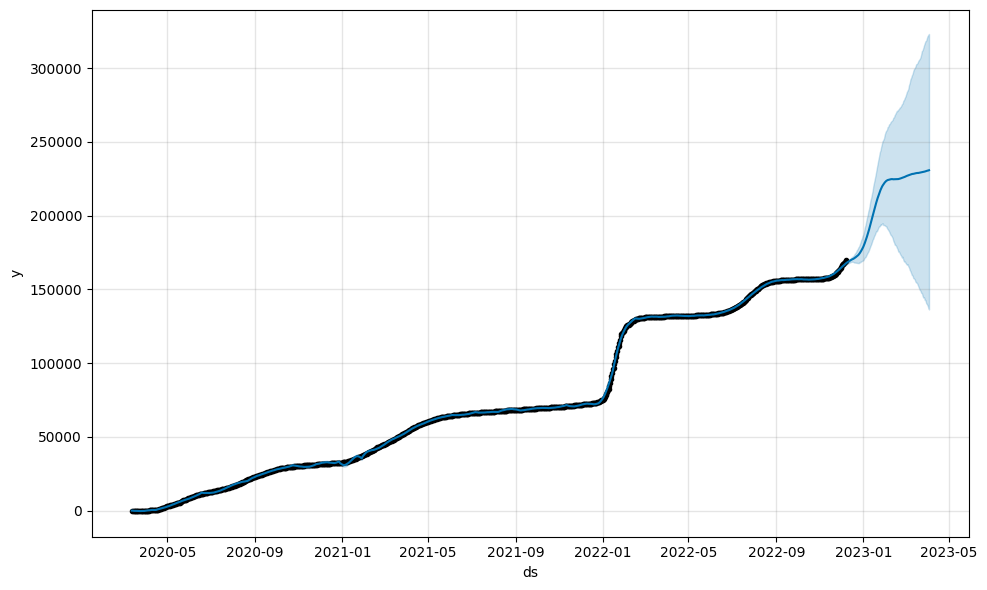

In [26]:
# Plot
fig1 = m.plot(forecast) # The model is stored in the letter m and we plot and then we pass the forecast df
# Blue line represents your prediction or yhat value 
# Shaded blue regions represent your bounding boxes (yhat upper and lower)
# built-in


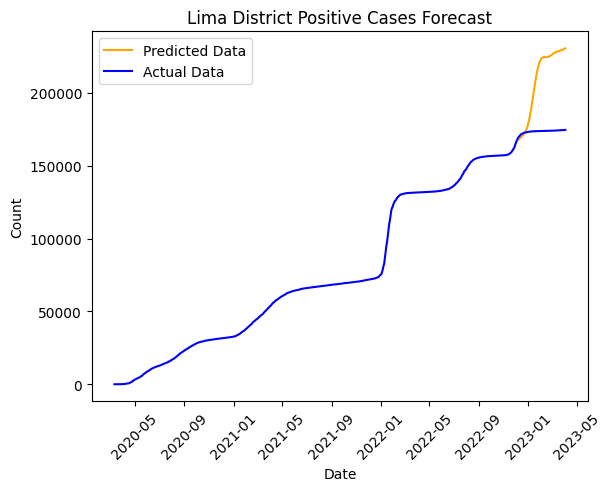

In [27]:
# Plot
plt.figure()
#forecast['actual_data'] = actual_data['y'].values
#fig1 = m.plot(forecast, xlabel='Date', ylabel='Value', c='blue')# The model is stored in the letter m and we plot and then we pass the forecast df
# Blue line represents your prediction or yhat value 
# Shaded blue regions represent your bounding boxes (yhat upper and lower)
# built-in
#fig1.gca().plot(actual_data['ds'], actual_data['y'], 'k.')
# Add the actual data of last 116 days to the curve 
# actual_data= df[1000:]
# print(actual_data)
plt.plot(predict_data[['ds']], predict_data[['yhat']], c='orange', label='Predicted Data')
plt.plot(df[['ds']], df[['y']], c='blue', label='Actual Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima District Positive Cases Forecast")
plt.legend()
# plt.grid()
plt.show()

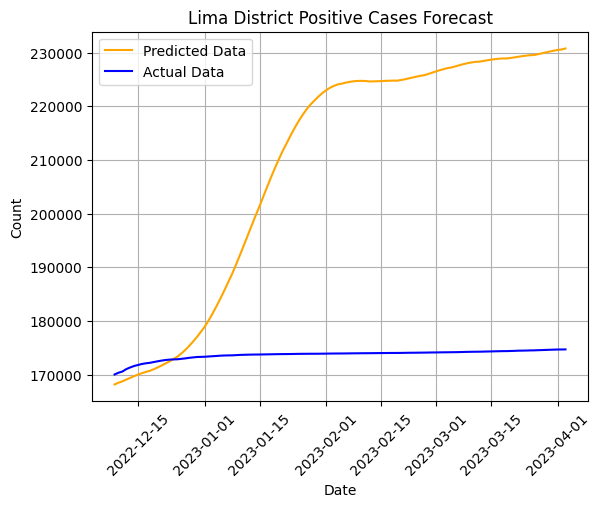

In [31]:
plt.figure()
plt.plot(predict_data[['ds']], predict_data[['yhat']], c='orange', label='Predicted Data')
plt.plot(actual_data[['ds']], actual_data[['y']], c='blue', label='Actual Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima District Positive Cases Forecast")
plt.legend()
plt.grid()
plt.show()

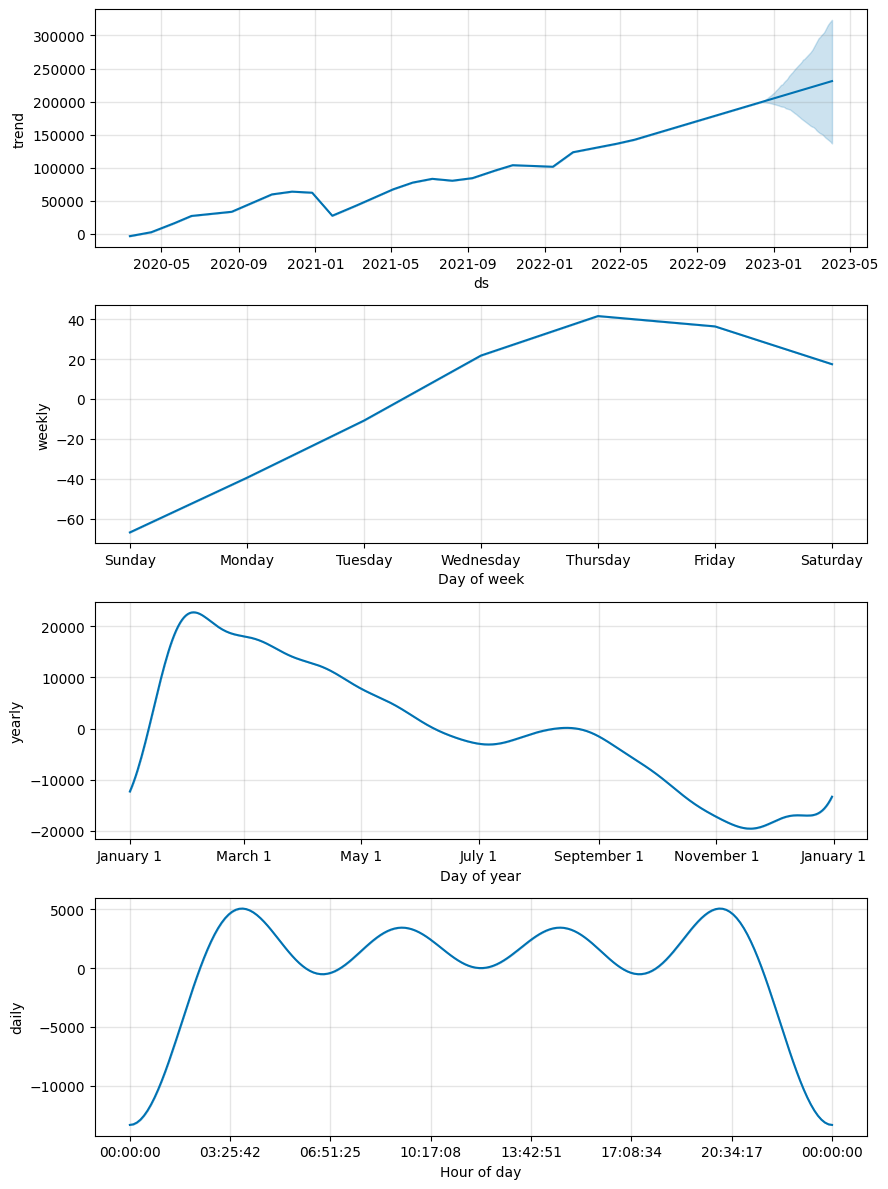

In [29]:
# If you want to see the forecast components, you can use the Prophet.plot_components method. 
# By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 
# If you include holidays, you’ll see those here, too.
fig2 = m.plot_components(forecast) # This is the decomposition of the trend
# This gives a lot of information on the trends (daily, weekly or seasonally)
# The overall trend is downwards with an upwards end ( From the beginning of 2021 until the end of 2022 it was a downwards trend)
# Weekly, nearly nothing happend if you see the numbers in y axis
# Yearly, during the first quarter you can see more activity then it lowers


In [30]:
# Prophet Lima District Error Calculation (Positive Cases)
# Evaluating the model performance
mae = mean_absolute_error(actual_data[['y']], predict_data[['yhat']])
mse = mean_squared_error(actual_data[['y']], predict_data[['yhat']])
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

mean_actual = actual_data[['y']].mean()[0]
print(mean_actual)
print(f"RMSE percentage: {(rmse/actual_data[['y']].mean()[0]*100)}%")

MAE: 36168.721937808186
MSE: 1760416194.1884806
RMSE: 41957.31395345132
173692.24137931035
RMSE percentage: 24.156124430350715%


In [ ]:
# # Alternative after fitting
# # Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 
# # You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. 
# # By default it will also include the dates from the history, so we will see the model fit as well.
# future = m.make_future_dataframe(periods=365)
# future.tail()

In [ ]:
# # An interactive figure of the forecast and components can be created with plotly. 
# # You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. 
# # You will also need to install the notebook and ipywidgets packages.
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(m, forecast)
# plot_components_plotly(m, forecast)

In [ ]:
print(len(df['ds'])*0.20)

223.20000000000002


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Splitting the data into training and testing sets
train = df[:-100]
test = df[-100:] # Last 10 days used as test


In [ ]:
# Fitting the Prophet model to the training data
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo68h9a0e/obhcdl1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo68h9a0e/7v5d8kkl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32516', 'data', 'file=/tmp/tmpo68h9a0e/obhcdl1i.json', 'init=/tmp/tmpo68h9a0e/7v5d8kkl.json', 'output', 'file=/tmp/tmpo68h9a0e/prophet_modelo93h4py4/prophet_model-20230420102430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making predictions on the test data
future = model.make_future_dataframe(periods=100, freq='D')
forecast = model.predict(future)[-100:]

In [ ]:
# Evaluating the model performance
mae = mean_absolute_error(test['y'], forecast['yhat'])
mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

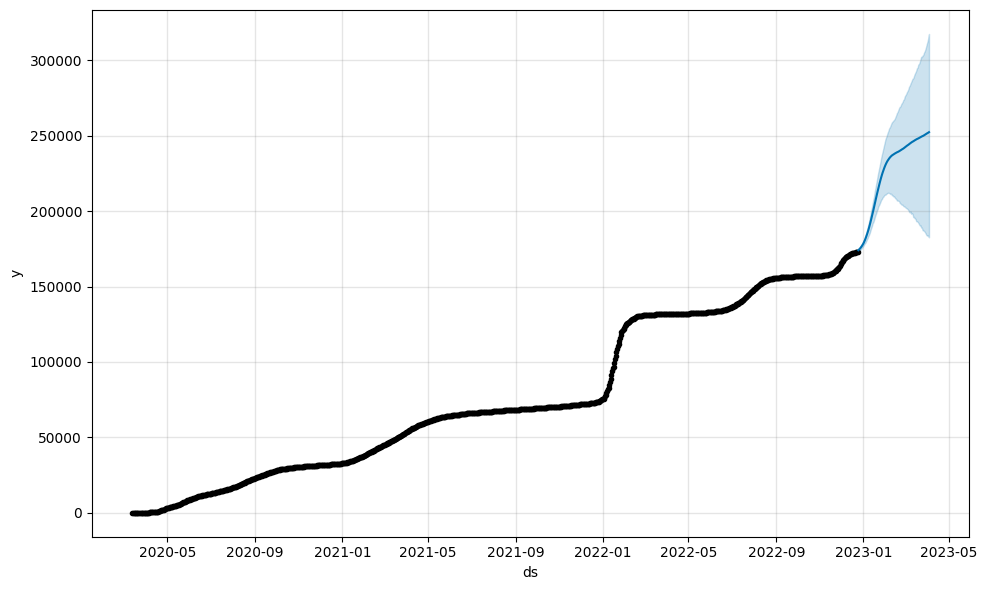

In [ ]:
# Visualizing the results
fig = model.plot(forecast)

In [ ]:
print(len(df['ds'])*0.20) # 223 days

223.20000000000002


In [ ]:
# Splitting the data into training and testing sets
train = df[:-223]
test = df[-223:] # Last 20 days used as test

In [ ]:
# Fitting the Prophet model to the training data
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo68h9a0e/5zjcnosa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo68h9a0e/uwbk39qi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66844', 'data', 'file=/tmp/tmpo68h9a0e/5zjcnosa.json', 'init=/tmp/tmpo68h9a0e/uwbk39qi.json', 'output', 'file=/tmp/tmpo68h9a0e/prophet_modelqis8ymb1/prophet_model-20230420102452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making predictions on the test data
future = model.make_future_dataframe(periods=223, freq='D')
forecast = model.predict(future)[-223:]

In [ ]:
# Evaluating the model performance
mae = mean_absolute_error(test['y'], forecast['yhat'])
mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 25495.555906803336
MSE: 800541924.6944901
RMSE: 28293.849591289094


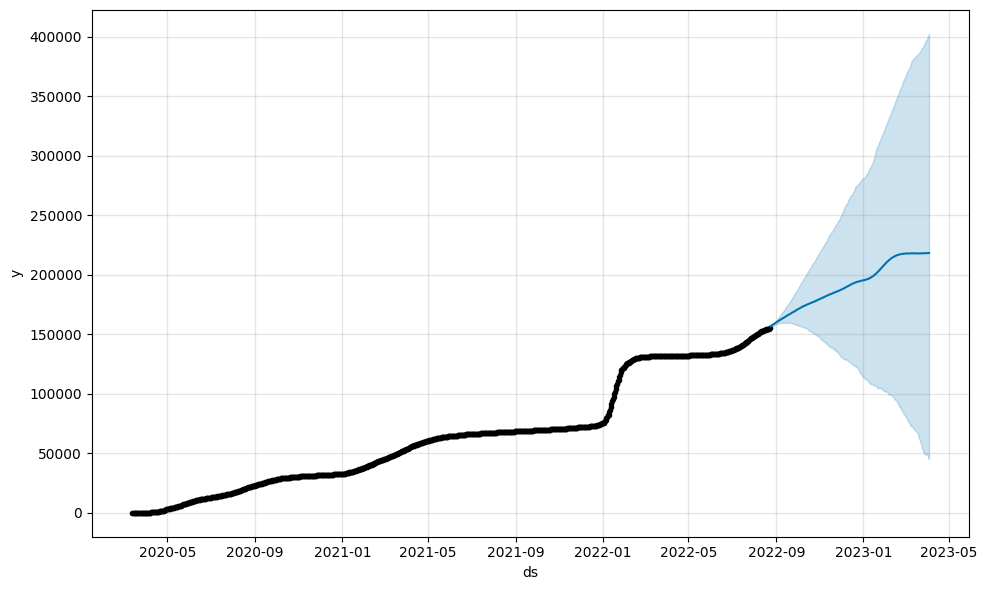

In [ ]:
# Visualizing the results
fig = model.plot(forecast)